In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv(r"C:\Users\dhruv\OneDrive\Desktop\amazon.csv", encoding ="iso-8859-1",parse_dates=['date'])

In [11]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# Display top 5 rows in the dataset

In [14]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Check the last 5 rows 

In [17]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# Find Shape of our dataset

In [20]:
data.shape

(6454, 5)

In [24]:
print("Number of rows", data.shape[0])
print("Number of column", data.shape[1])

Number of rows 6454
Number of column 5


# Getting Information about our dataset

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# Check for duplicate data and drop them

In [34]:
dup_data=data.duplicated().any()

In [36]:
print("Are there any duplicates?", dup_data)

Are there any duplicates? True


In [38]:
data=data.drop_duplicates()

In [40]:
data.shape

(6422, 5)

# Check Null Values in the dataset

In [45]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# Get Overall statistics 

In [51]:
data.describe(include ='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# Rename Month Names to English

In [53]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [55]:
data['month_new']=data['month'].map({'Janeiro':'jan',
                                     'Fevereiro':'feb',
                                     'Marco':'march',
                                     'Abril':'april',
                                     'Maio':'may',
                                     'Junho':'jun',
                                     'Julho':'july',
                                     'Agosto':'august',
                                     'Setembro':'sep',
                                     'Outubro':'oct',
                                     'Novembro':'nov',
                                     'Decembro':'dec'
                                    })

In [57]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


# Total number of forest fires registered

In [60]:
data.shape

(6422, 6)

# In which month maximum number of forest fires were reported

In [63]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [71]:
data1=data.groupby('month_new')['number'].sum().reset_index()

In [73]:
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,feb,30839.050
3,jan,47681.844
4,july,92319.113
5,jun,55997.675
6,may,34725.363
7,nov,85508.054
8,oct,88681.579
9,sep,58578.305


<Axes: xlabel='month_new', ylabel='number'>

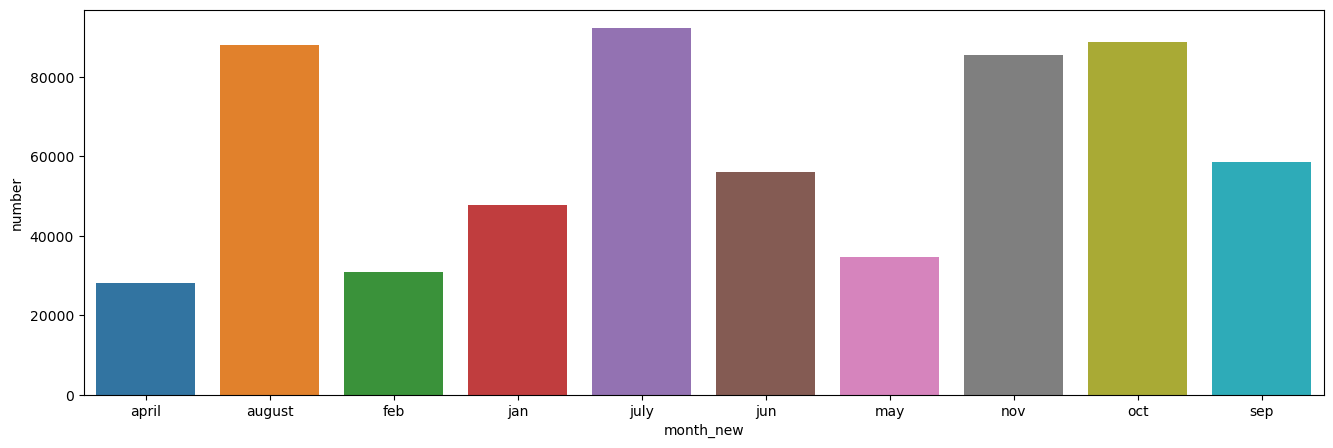

In [77]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new', y='number', data =data1)

# In which year maximum number of forest fires were reported

In [82]:
data2=data.groupby('year')['number'].sum().reset_index()

In [84]:
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

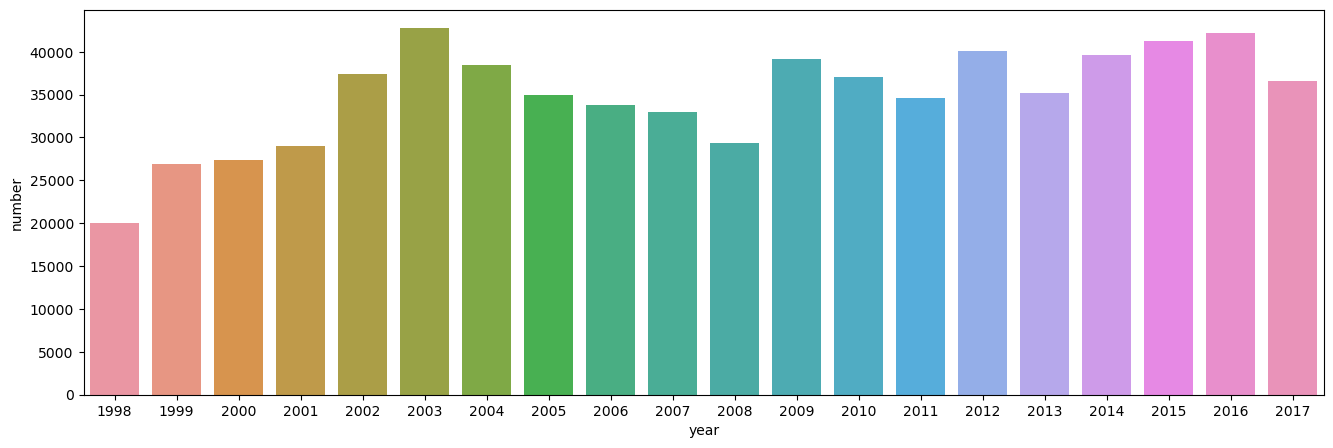

In [86]:
plt.figure(figsize =(16,5))
sns.barplot(x='year', y='number', data=data2)

# In which state maximum number of forest fire were reported

In [89]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [95]:
data3 = data.groupby('state')['number'].sum().reset_index()

In [97]:
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


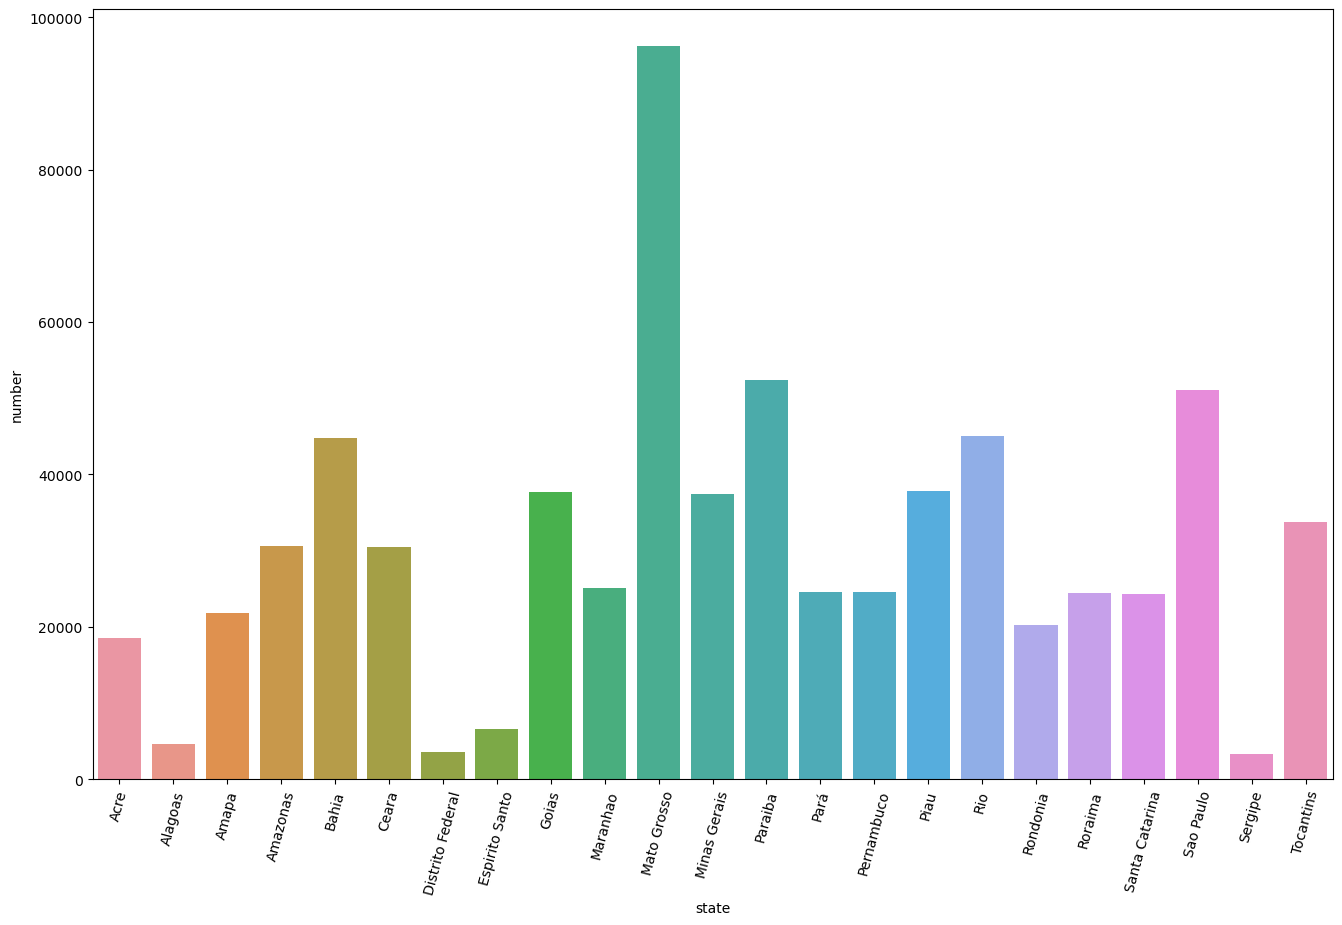

In [107]:
plt.figure(figsize=(16,10))
sns.barplot(x='state', y='number', data=data3)
plt.xticks(rotation =75)
plt.show()

# Find total number of fires were reported in amazons

In [110]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [116]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

# Display number of fires reported in amazonas(year-wise)

In [119]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [123]:
data4=data[data['state']=='Amazonas']

In [131]:
data5=data4.groupby('year')['number'].sum().reset_index()

In [133]:
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

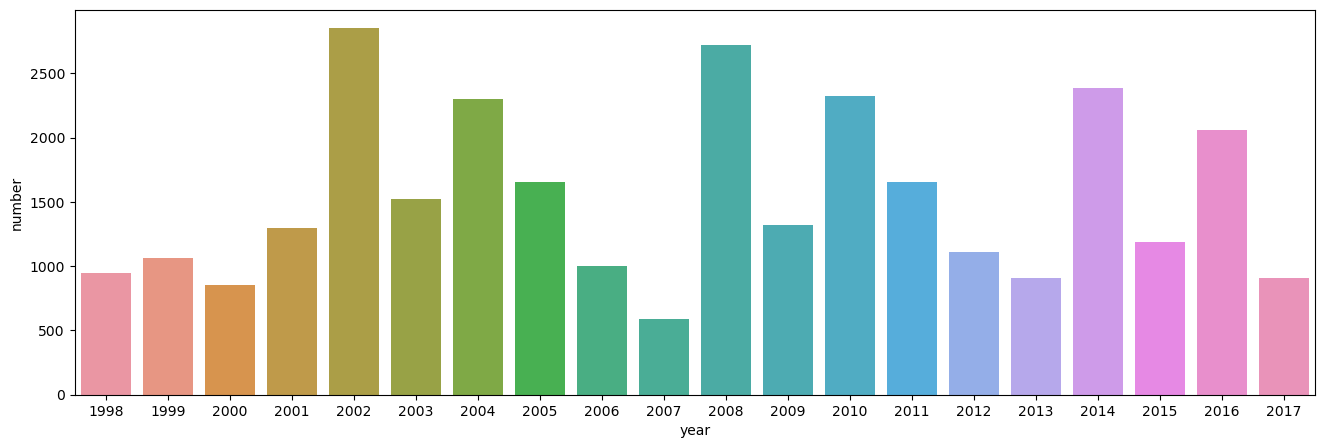

In [137]:
plt.figure(figsize=[16,5])
sns.barplot(x='year', y='number', data=data5)

# Display Number of Fires were reported in amazonas(Day-Wise)

In [140]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [142]:
data6= data[data['state']=='Amazonas']

In [172]:
data6.loc[:, 'date'] = pd.to_datetime(data6['date'])

In [180]:
data6.loc[:, 'number'] = pd.to_numeric(data6['number'])

In [182]:
result = data6.groupby(data6['date'].dt.dayofweek)['number'].sum()


In [184]:
result

date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [186]:
import calendar
result.index =[calendar.day_name[x] for x in range(0,7)]
result=result.reset_index()

In [188]:
result

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

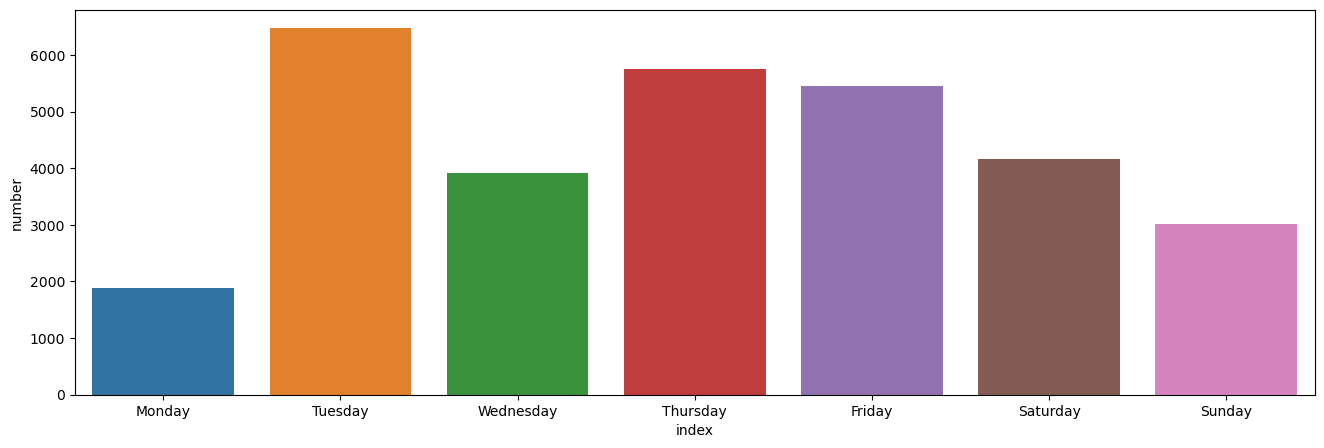

In [192]:
plt.figure(figsize=[16,5])
sns.barplot(x='index', y='number', data= result)

# Find Total Number of Fires Were Reported in 2015 and Visualize Data Based on Each 'Month'

In [195]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [207]:
fire=data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [209]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,feb,2309.000
3,jan,4635.000
4,july,4364.392
5,jun,3260.552
6,may,2384.000
7,nov,4034.518
8,oct,4499.525
9,sep,2494.658


<Axes: xlabel='month_new', ylabel='number'>

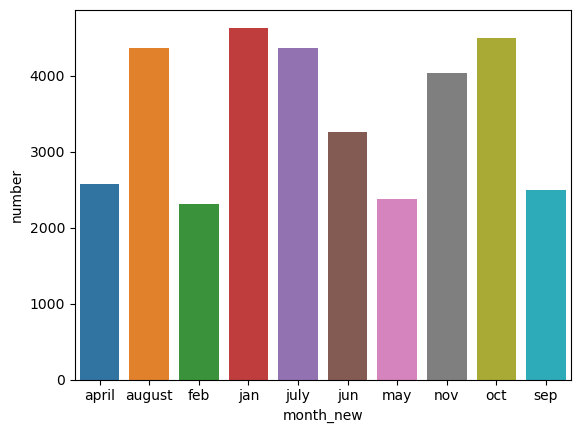

In [211]:
sns.barplot(x='month_new',y='number', data=fire)

# Find Average Number of fires were reported from Highest to lowest(State-Wise)

In [214]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [218]:
data8=data.groupby('state')['number'].mean().sort_values(ascending =False)

In [220]:
data8

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

# To Find the State Names where firs were reported in 'Dec' Month

In [231]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [245]:
data['month_new']=='dec'

0       False
1       False
2       False
3       False
4       False
        ...  
6449    False
6450    False
6451    False
6452    False
6453    False
Name: month_new, Length: 6422, dtype: bool